In [2]:
!mkdir -p ~/.kaggle
!cp kaggle.json ~/.kaggle/

cp: cannot stat 'kaggle.json': No such file or directory


In [3]:
!kaggle datasets download -d salader/dogs-vs-cats

Dataset URL: https://www.kaggle.com/datasets/salader/dogs-vs-cats
License(s): unknown
100% 1.06G/1.06G [00:59<00:00, 18.7MB/s]
100% 1.06G/1.06G [00:59<00:00, 19.1MB/s]


In [4]:
import zipfile
zip_ref=zipfile.ZipFile('/content/dogs-vs-cats.zip','r')
zip_ref.extractall('/content')
zip_ref.close()

In [5]:
import tensorflow as tf
from tensorflow import keras
from keras import Sequential
from keras.layers import Dense,Flatten,Conv2D,MaxPooling2D, BatchNormalization, Dropout

In [6]:
# generators
train_ds=keras.utils.image_dataset_from_directory(
    directory='/content/train',
    labels="inferred",
    label_mode="int",
    batch_size=32,
    image_size=(256, 256)
)

validation_ds=keras.utils.image_dataset_from_directory(
    directory='/content/test',
    labels="inferred",
    label_mode="int",
    batch_size=32,
    image_size=(256, 256)
)

Found 20000 files belonging to 2 classes.
Found 5000 files belonging to 2 classes.


In [7]:
# normalized
def process(image,label):
  # cast(x,dtype)
  tf.cast(image/255.,tf.float32)
  return image,label

train_ds=train_ds.map(process)
validation_ds=validation_ds.map(process)

In [8]:
# create CNN model
model=Sequential()
model.add(Conv2D(32,kernel_size=(3,3),padding="valid",activation='relu',input_shape=(256,256,3)))
model.add(MaxPooling2D(pool_size=(2,2),strides=2,padding='valid'))

model.add(Conv2D(64,kernel_size=(3,3),padding="valid",activation='relu'))
model.add(MaxPooling2D(pool_size=(2,2),strides=2,padding="valid"))

model.add(Conv2D(128,kernel_size=(3,3),padding="valid",activation='relu'))
model.add(MaxPooling2D(pool_size=(2,2),strides=2,padding="valid"))

model.add(Flatten())

model.add(Dense(128,activation='relu'))
model.add(Dense(64,activation='relu'))
model.add(Dense(1,activation='sigmoid'))

In [9]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 254, 254, 32)      896       
                                                                 
 max_pooling2d (MaxPooling2  (None, 127, 127, 32)      0         
 D)                                                              
                                                                 
 conv2d_1 (Conv2D)           (None, 125, 125, 64)      18496     
                                                                 
 max_pooling2d_1 (MaxPoolin  (None, 62, 62, 64)        0         
 g2D)                                                            
                                                                 
 conv2d_2 (Conv2D)           (None, 60, 60, 128)       73856     
                                                                 
 max_pooling2d_2 (MaxPoolin  (None, 30, 30, 128)       0

In [10]:
model.compile(loss='binary_crossentropy',optimizer='adam',metrics=['accuracy'])

In [11]:
history=model.fit(train_ds,epochs=10,validation_data=validation_ds)

Epoch 1/10
625/625 [==============================] - 71s 102ms/step - loss: 2.2347 - accuracy: 0.5421 - val_loss: 0.6885 - val_accuracy: 0.5382
Epoch 2/10
625/625 [==============================] - 51s 81ms/step - loss: 0.6958 - accuracy: 0.5336 - val_loss: 0.6921 - val_accuracy: 0.5486
Epoch 3/10
625/625 [==============================] - 51s 81ms/step - loss: 0.6739 - accuracy: 0.5637 - val_loss: 0.6944 - val_accuracy: 0.5516
Epoch 4/10
625/625 [==============================] - 52s 83ms/step - loss: 0.6260 - accuracy: 0.6185 - val_loss: 0.7461 - val_accuracy: 0.5682
Epoch 5/10
625/625 [==============================] - 56s 88ms/step - loss: 0.5887 - accuracy: 0.6490 - val_loss: 0.8052 - val_accuracy: 0.5690
Epoch 6/10
625/625 [==============================] - 51s 81ms/step - loss: 0.5216 - accuracy: 0.7003 - val_loss: 1.0078 - val_accuracy: 0.5736
Epoch 7/10
625/625 [==============================] - 52s 83ms/step - loss: 0.4759 - accuracy: 0.7340 - val_loss: 1.2734 - val_accuracy

In [12]:
import matplotlib.pyplot as plt


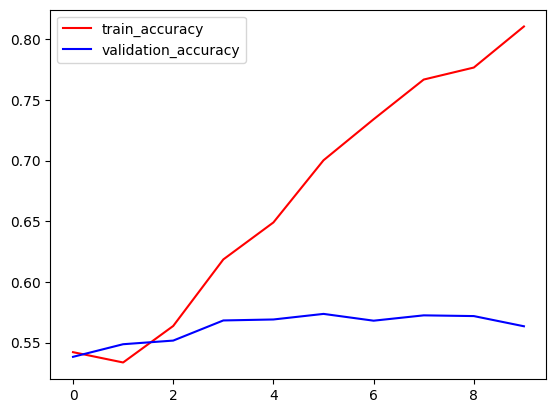

In [13]:
plt.plot(history.history['accuracy'],color='red',label='train_accuracy')
plt.plot(history.history['val_accuracy'],color='blue',label='validation_accuracy')
plt.legend()
plt.show()

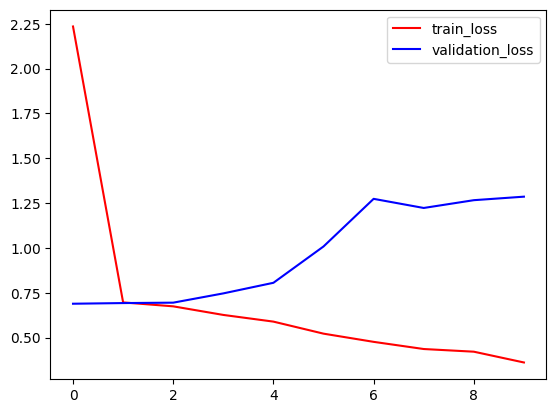

In [14]:
plt.plot(history.history['loss'],color='red',label='train_loss')
plt.plot(history.history['val_loss'],color='blue',label='validation_loss')
plt.legend()
plt.show()

# way to reduce overfitting
1. add more data
2. dropout
3. L1,L2 regularization
4. batch normalization
5. reduce complexity
6. data augmentation

In [16]:
# create CNN model
model=Sequential()
model.add(Conv2D(32,kernel_size=(3,3),padding="valid",activation='relu',input_shape=(256,256,3)))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2,2),strides=2,padding='valid'))

model.add(Conv2D(64,kernel_size=(3,3),padding="valid",activation='relu'))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2,2),strides=2,padding="valid"))

model.add(Conv2D(128,kernel_size=(3,3),padding="valid",activation='relu'))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2,2),strides=2,padding="valid"))

model.add(Flatten())

model.add(Dense(128,activation='relu'))
model.add(Dropout(0.1))
model.add(Dense(64,activation='relu'))
model.add(Dropout(0.1))
model.add(Dense(1,activation='sigmoid'))

In [17]:
model.compile(loss='binary_crossentropy',optimizer='adam',metrics=['accuracy'])
history=model.fit(train_ds,epochs=10,validation_data=validation_ds)

Epoch 1/10
625/625 [==============================] - 68s 103ms/step - loss: 1.2571 - accuracy: 0.5643 - val_loss: 0.6846 - val_accuracy: 0.5884
Epoch 2/10
625/625 [==============================] - 64s 102ms/step - loss: 0.6659 - accuracy: 0.6093 - val_loss: 0.6205 - val_accuracy: 0.6544
Epoch 3/10
625/625 [==============================] - 65s 103ms/step - loss: 0.6131 - accuracy: 0.6670 - val_loss: 0.5773 - val_accuracy: 0.7000
Epoch 4/10
625/625 [==============================] - 64s 102ms/step - loss: 0.5628 - accuracy: 0.7183 - val_loss: 0.6314 - val_accuracy: 0.6426
Epoch 5/10
625/625 [==============================] - 63s 101ms/step - loss: 0.5314 - accuracy: 0.7357 - val_loss: 0.7397 - val_accuracy: 0.6644
Epoch 6/10
625/625 [==============================] - 64s 102ms/step - loss: 0.5110 - accuracy: 0.7526 - val_loss: 0.6433 - val_accuracy: 0.6990
Epoch 7/10
625/625 [==============================] - 64s 102ms/step - loss: 0.4630 - accuracy: 0.7832 - val_loss: 0.5863 - val_ac

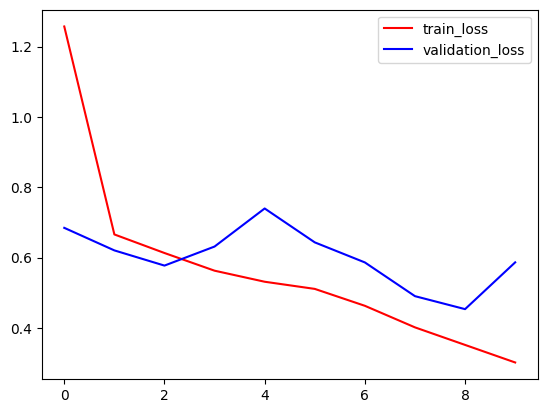

In [18]:
plt.plot(history.history['loss'],color='red',label='train_loss')
plt.plot(history.history['val_loss'],color='blue',label='validation_loss')
plt.legend()
plt.show()

In [19]:
model=Sequential()
model.add(Conv2D(32,kernel_size=(3,3),padding="valid",activation='relu',input_shape=(256,256,3),kernel_regularizer=tf.keras.regularizers.l2(0.05)))
model.add(MaxPooling2D(pool_size=(2,2),strides=2,padding='valid'))

model.add(Conv2D(64,kernel_size=(3,3),padding="valid",activation='relu',kernel_regularizer=tf.keras.regularizers.l2(0.03)))
model.add(MaxPooling2D(pool_size=(2,2),strides=2,padding="valid"))

model.add(Conv2D(128,kernel_size=(3,3),padding="valid",activation='relu',kernel_regularizer=tf.keras.regularizers.l2(0.01)))
model.add(MaxPooling2D(pool_size=(2,2),strides=2,padding="valid"))

model.add(Flatten())

model.add(Dense(128,activation='relu',kernel_regularizer=tf.keras.regularizers.l2(0.01)))
model.add(Dense(64,activation='relu',kernel_regularizer=tf.keras.regularizers.l2(0.01)))

model.add(Dense(1,activation='sigmoid'))

In [21]:
model.compile(loss='binary_crossentropy',optimizer='Adam',metrics=['accuracy'])
history=model.fit(train_ds,epochs=10,validation_data=validation_ds)

Epoch 1/10
625/625 [==============================] - 66s 102ms/step - loss: 0.8354 - accuracy: 0.6039 - val_loss: 0.6534 - val_accuracy: 0.6844
Epoch 2/10
625/625 [==============================] - 66s 105ms/step - loss: 0.6367 - accuracy: 0.6935 - val_loss: 0.6101 - val_accuracy: 0.7122
Epoch 3/10
625/625 [==============================] - 51s 81ms/step - loss: 0.6092 - accuracy: 0.7046 - val_loss: 0.5957 - val_accuracy: 0.7262
Epoch 4/10
625/625 [==============================] - 50s 79ms/step - loss: 0.5976 - accuracy: 0.7154 - val_loss: 0.6166 - val_accuracy: 0.7076
Epoch 5/10
625/625 [==============================] - 50s 80ms/step - loss: 0.5843 - accuracy: 0.7273 - val_loss: 0.5770 - val_accuracy: 0.7346
Epoch 6/10
625/625 [==============================] - 50s 80ms/step - loss: 0.5719 - accuracy: 0.7395 - val_loss: 0.5773 - val_accuracy: 0.7372
Epoch 7/10
625/625 [==============================] - 51s 82ms/step - loss: 0.5653 - accuracy: 0.7482 - val_loss: 0.5771 - val_accurac

In [ ]:
plt.plot(history.history['loss'],color='red',label='train_loss')
plt.plot(history.history['val_loss'],color='blue',label='validation_loss')
plt.legend()
plt.show()